<a href="https://colab.research.google.com/github/alex748970/Ecommerce-/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import warnings
warnings.filterwarnings('ignore')

In [4]:
Ecom = pd.read_csv('/content/ecommerce_customer_behavior_dataset.csv')
pd.DataFrame(Ecom)
Ecom

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [5]:
Ecom.shape

(5000, 18)

In [6]:
Ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   int64  
 14  Pages_Vi

In [7]:
print(Ecom.dtypes)

Order_ID                     object
Customer_ID                  object
Date                         object
Age                           int64
Gender                       object
City                         object
Product_Category             object
Unit_Price                  float64
Quantity                      int64
Discount_Amount             float64
Total_Amount                float64
Payment_Method               object
Device_Type                  object
Session_Duration_Minutes      int64
Pages_Viewed                  int64
Is_Returning_Customer          bool
Delivery_Time_Days            int64
Customer_Rating               int64
dtype: object


In [8]:
Ecom.describe()

,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


In [9]:
Ecom.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


In [10]:
Ecom.isnull().sum().sum()

np.int64(0)

In [11]:
num = Ecom.select_dtypes(include = 'number').columns
num

Index(['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days',
       'Customer_Rating'],
      dtype='object')

In [12]:
obj = Ecom.select_dtypes(include = 'object').columns
obj

Index(['Order_ID', 'Customer_ID', 'Date', 'Gender', 'City', 'Product_Category',
       'Payment_Method', 'Device_Type'],
      dtype='object')

EDA E_commerece Data analysis

<Axes: xlabel='Gender', ylabel='Payment_Method'>

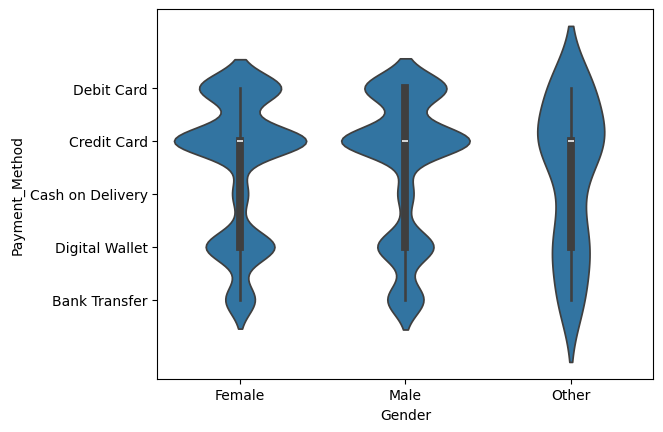

In [46]:
ax = sns.violinplot(x = 'Gender', y = 'Payment_Method', data = Ecom)
ax

<Axes: xlabel='Gender', ylabel='count'>

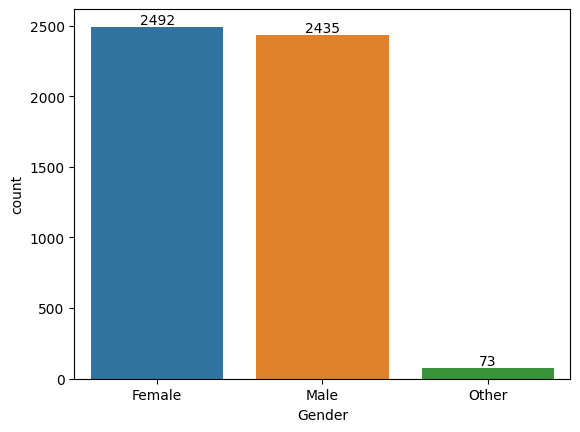

In [13]:
ax = sns.countplot(x = 'Gender', data = Ecom , hue ='Gender')
for bar in ax.containers:
  ax.bar_label(bar)
ax

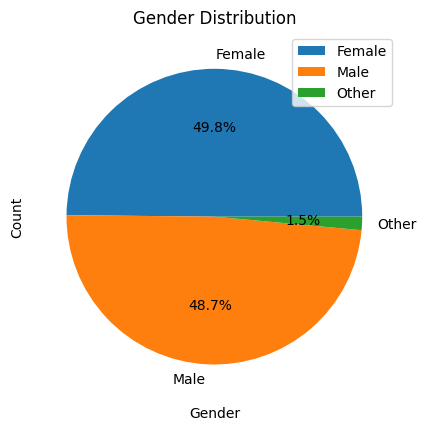

<Figure size 640x480 with 0 Axes>

In [14]:
ax = Ecom['Gender'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.legend()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()
plt.savefig('Gender_Distribution.png')

In [15]:
Ecom['Product_Category']

,Product_Category
0,Toys
1,Toys
2,Food
3,Electronics
4,Sports
...,...
4995,Beauty
4996,Beauty
4997,Food
4998,Fashion


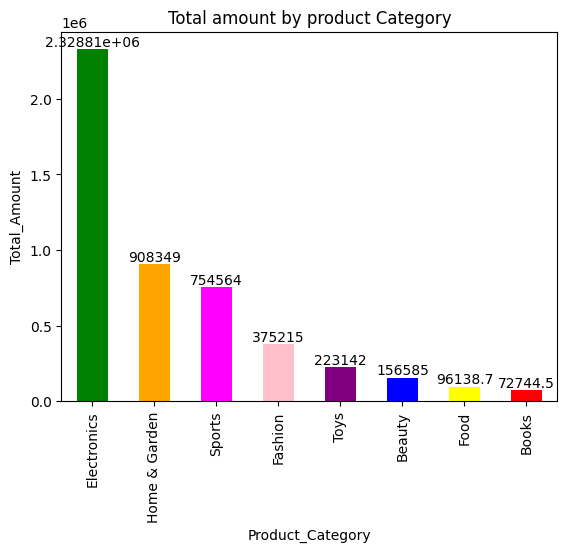

In [16]:
ax = Ecom.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending  = False).plot(kind = 'bar' , color = ['Green','orange','magenta','pink','purple','blue','yellow','red'])
plt.xlabel('Product_Category')
plt.ylabel('Total_Amount')
plt.title('Total amount by product Category')
for bar in ax.containers:
  ax.bar_label(bar)
plt.show()

In [17]:
Ecom['Payment_Method']

,Payment_Method
0,Debit Card
1,Credit Card
2,Credit Card
3,Credit Card
4,Cash on Delivery
...,...
4995,Bank Transfer
4996,Debit Card
4997,Digital Wallet
4998,Credit Card


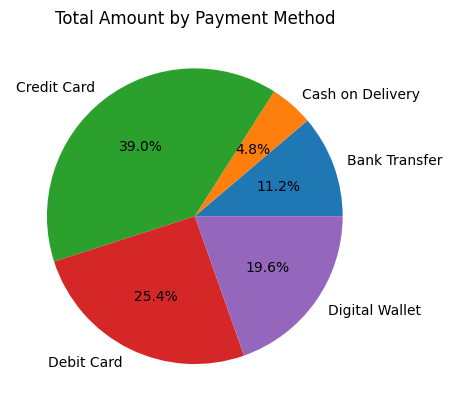

<Figure size 640x480 with 0 Axes>

In [18]:
ax = Ecom.groupby('Payment_Method')['Total_Amount'].sum().plot(kind = 'pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Total Amount by Payment Method')
plt.show()
plt.savefig('Total Amount by Payment Method.png')

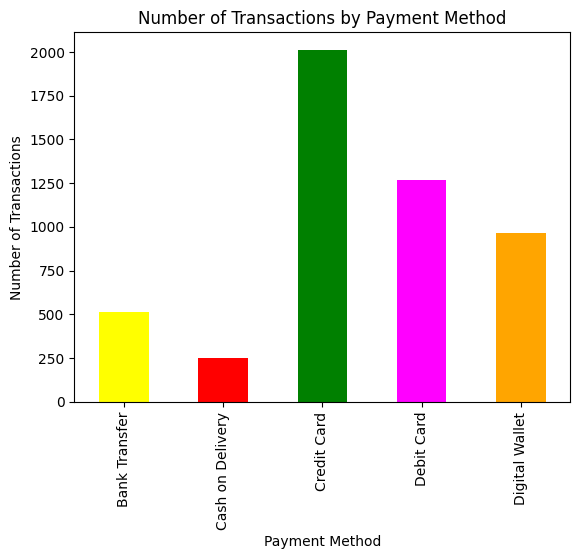

In [19]:
ax = Ecom.groupby('Payment_Method')['Product_Category'].count().plot(kind ='bar', color = ['yellow','red','green','magenta','orange'])
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Payment Method')
plt.show()


In [20]:
Ecom.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [21]:
ax = Ecom.groupby('Product_Category')['Unit_Price'].sum()
ax

,Unit_Price
Product_Category,
Beauty,69588.06
Books,34571.31
Electronics,1089559.19
Fashion,172867.23
Food,45282.31
Home & Garden,425569.29
Sports,338478.77
Toys,103254.44


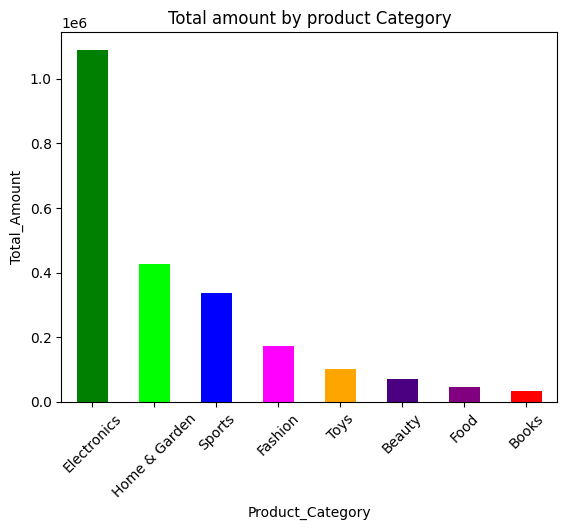

In [22]:
ax = Ecom.groupby('Product_Category')['Unit_Price'].sum().sort_values(ascending = False)
ax.plot(kind = 'bar' ,color = ['green','lime','blue','magenta','orange','indigo','purple','red'])
plt.xlabel('Product_Category')
plt.ylabel('Total_Amount')
plt.title('Total amount by product Category')
plt.xticks(rotation = 45)
plt.savefig('Total amount by product Category.png')
plt.show()

In [23]:
Ecom

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD_001048,CUST_01048,2024-03-26,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,ORD_001051,CUST_01051,2024-03-26,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,ORD_003543,CUST_03543,2024-03-26,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,ORD_004443,CUST_04443,2024-03-26,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [24]:
Ecom.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [25]:
ax = Ecom['Device_Type'].value_counts().sort_values( ascending = False)
ax

,count
Device_Type,
Mobile,2795
Desktop,1711
Tablet,494


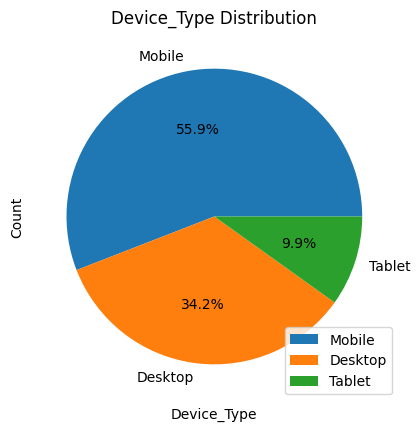

<Figure size 640x480 with 0 Axes>

In [26]:
ax=Ecom['Device_Type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.legend()
plt.xlabel('Device_Type')
plt.ylabel('Count')
plt.title('Device_Type Distribution')
plt.show()
plt.savefig('Device_Type Distribution.png')

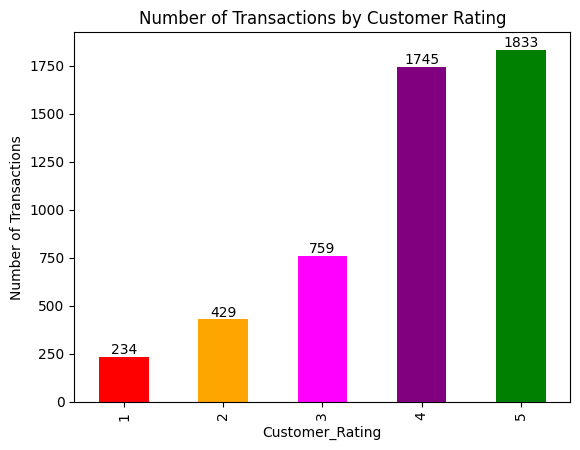

In [27]:
ax = Ecom.groupby('Customer_Rating')['Device_Type'].count().plot(kind = 'bar', color = ['red','orange','magenta','purple','green'])
plt.xlabel('Customer_Rating')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Customer Rating')
plt.savefig('Number of Transactions by Customer Rating.png')
for bar in ax.containers:
  ax.bar_label(bar)
plt.show()

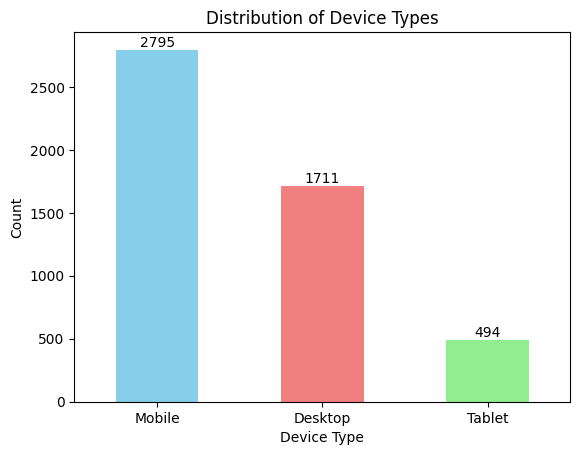

In [28]:
ax = Ecom['Device_Type'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.title('Distribution of Device Types')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.show()

In [29]:
Ecom['City']

,City
0,Bursa
1,Konya
2,Ankara
3,Istanbul
4,Istanbul
...,...
4995,Izmir
4996,Adana
4997,Antalya
4998,Istanbul


In [30]:
ax = Ecom['City'].value_counts()
ax

,count
City,
Istanbul,1284
Ankara,735
Izmir,600
Bursa,496
Adana,378
Antalya,374
Gaziantep,349
Konya,317
Kayseri,257


In [31]:
ax = Ecom.groupby('City')['Total_Amount'].sum().sort_values(ascending = False)
ax

,Total_Amount
City,
Istanbul,1334122.56
Ankara,657535.82
Izmir,567534.67
Bursa,459076.31
Adana,427059.63
Konya,344974.94
Gaziantep,318408.41
Antalya,315549.89
Kayseri,312303.91


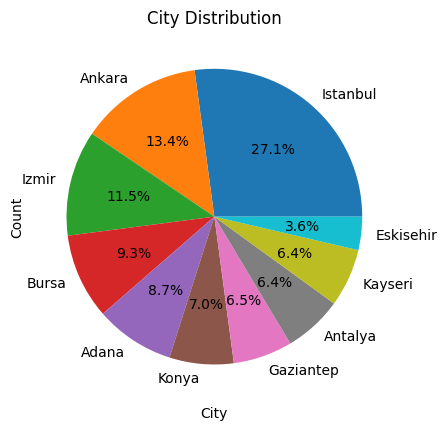

<Figure size 640x480 with 0 Axes>

In [32]:
ax = Ecom.groupby('City')['Total_Amount'].sum().sort_values(ascending = False).plot(kind = 'pie' , autopct = '%1.1f%%')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.show()
plt.savefig('City Distribution.png')


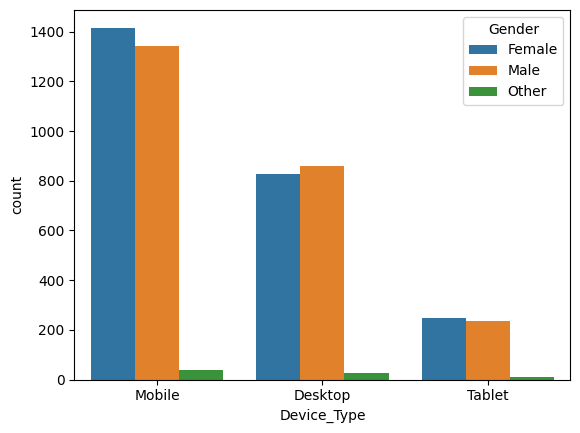

In [33]:
ax = sns.countplot(x = 'Device_Type', data = Ecom , hue ='Gender')

In [34]:
Ecom.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

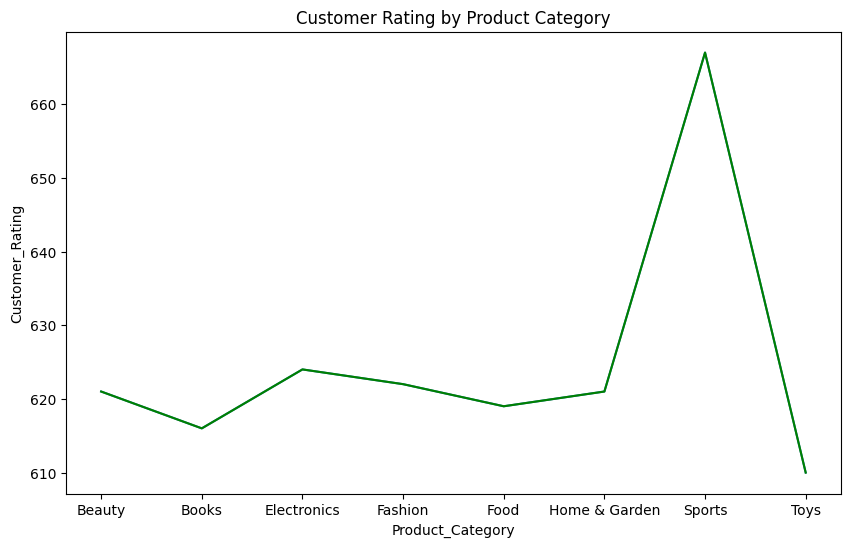

In [35]:
plt.figure(figsize=(10, 6))
ax = Ecom.groupby('Product_Category')['Customer_Rating'].count()
ax.plot(x='Product_Category',y = 'Customer_Rating')
ax.plot(color = 'green')
plt.xlabel('Product_Category')
plt.ylabel('Customer_Rating')
plt.title('Customer Rating by Product Category')
plt.savefig('Customer Rating by Product Category.png')


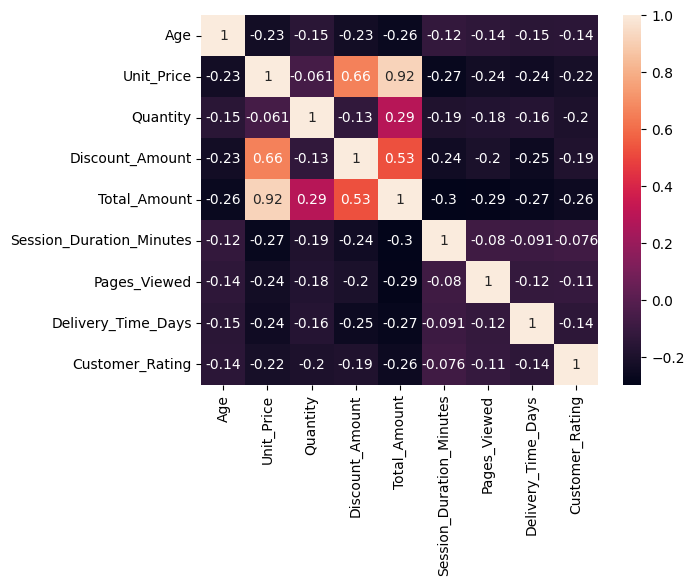

In [36]:
al= Ecom.select_dtypes(include = 'number').corr()
ax = sns.heatmap(al.corr(), annot = True)

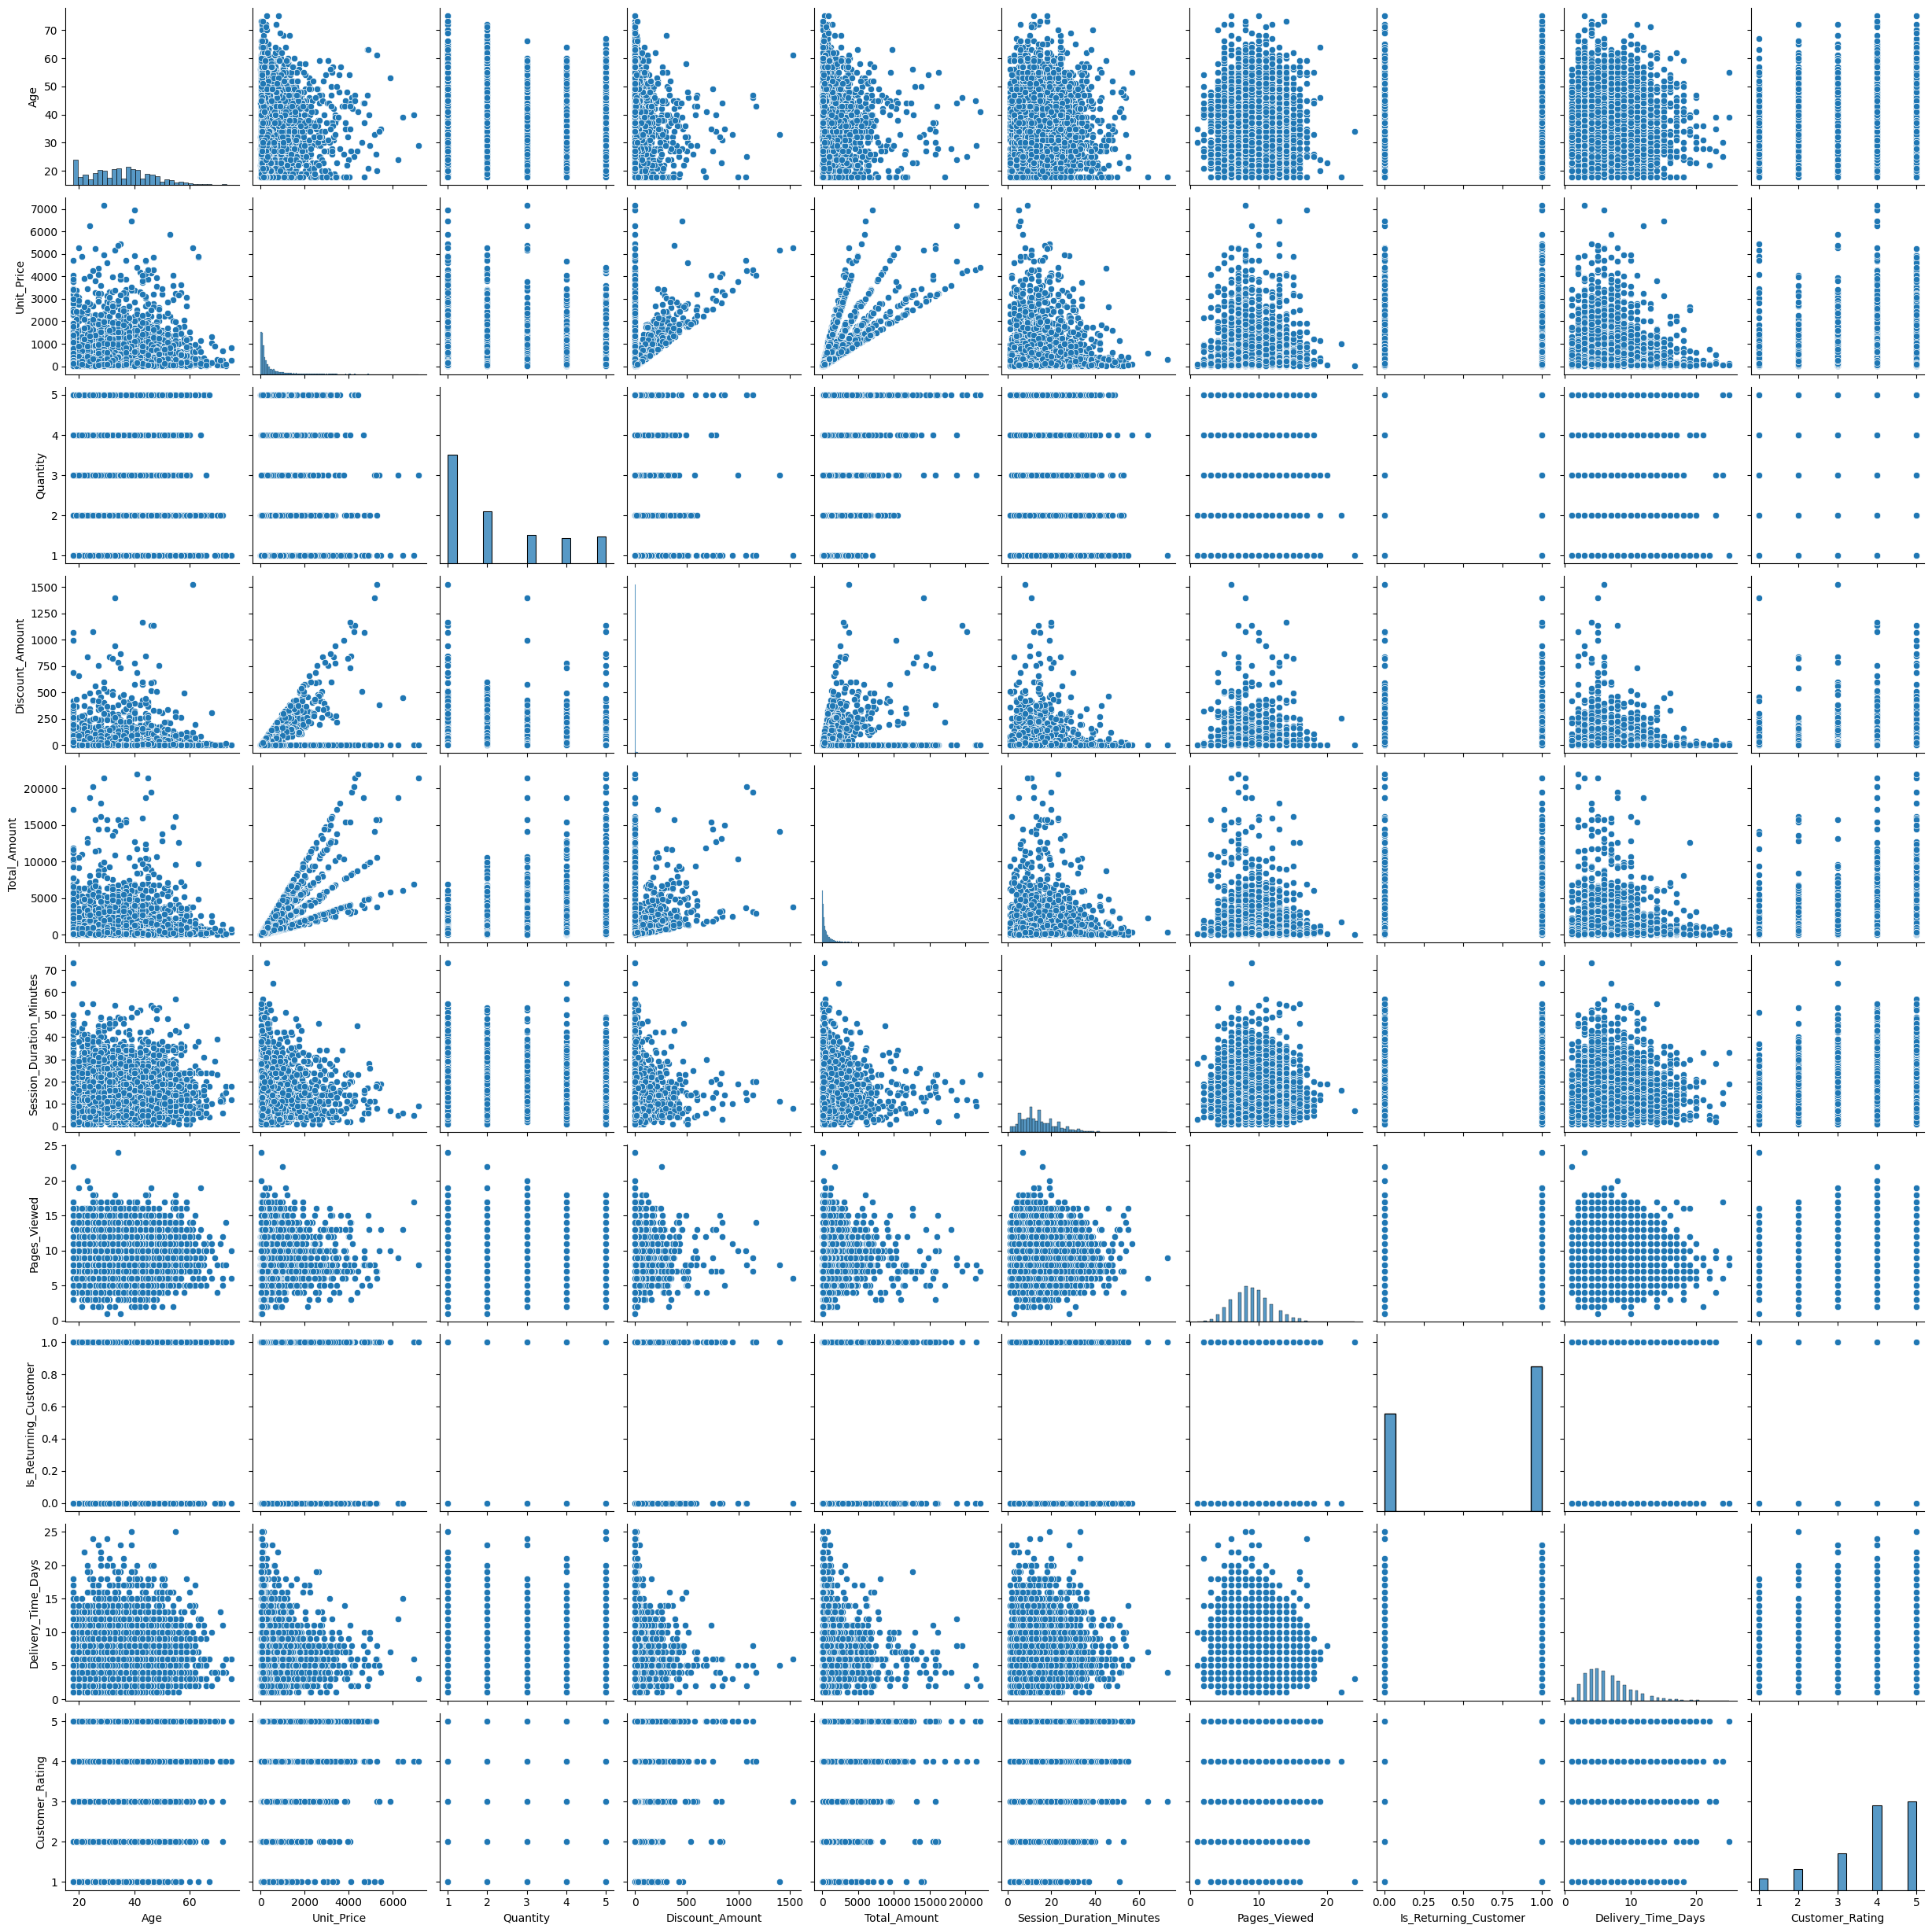

In [37]:
ax = sns.pairplot(Ecom)
ax

In [47]:
Ecom.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

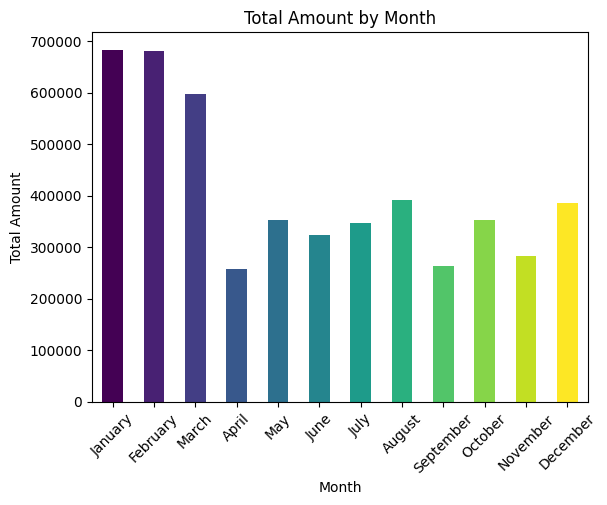

In [55]:
Ecom['Date'] = pd.to_datetime(Ecom['Date'])
Ecom['MonthName'] = Ecom['Date'].dt.strftime('%B')

# Define the order of months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Ecom['MonthName'] = pd.Categorical(Ecom['MonthName'], categories=month_order, ordered=True)

monthly_total = Ecom.groupby('MonthName')['Total_Amount'].sum()

# Generate a list of colors, one for each month
colors = plt.cm.get_cmap('viridis', len(month_order))

ax = monthly_total.plot(kind = 'bar', color = colors.colors)
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Total Amount by Month')
plt.xticks(rotation=45)
plt.show()